In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
prosper_data = pd.read_csv("./prosperLoanData_clean.csv")

In [3]:
y = prosper_data.BorrowerRate

In [4]:
X = prosper_data.drop(columns = ['BorrowerRate'])

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=3)

In [33]:
model = linear_model.Ridge(alpha=.2)

In [34]:
model.fit(Xtrain,ytrain)

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
ypred = model.predict(Xtest)

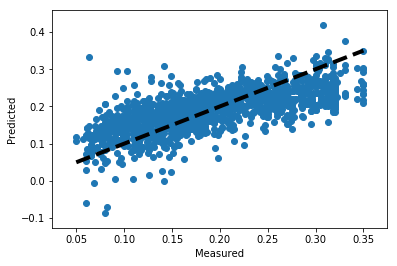

In [36]:
fig, ax = plt.subplots()
ax.scatter(ytest, ypred)
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [37]:
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: 0.50 (0.03) MSE
